In [27]:
pwd

'/home/wsuser/work'

In [ ]:
!pip install keras==2.11.0
!pip install tensorflow==1.0.0

     |████████████████████████████████| 1.7 MB 19.1 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0


# **UNDERSTANDING THE DATA**

**IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import numpy #for numerical analysis
import tensorflow #open source ml tool by google
from tensorflow.keras.datasets import mnist 

# mnist dataset
from tensorflow.keras.models import Sequential # stack for layers
from tensorflow.keras import layers #input,middle and output layers forcnn structure
from tensorflow.keras.layers import Dense,Flatten #dense and flatten layers
from tensorflow.keras.layers import Conv2D #convolutional layers
from tensorflow import keras #library for building neural networks built on tensorflow
from tensorflow.keras.optimizers import Adam #optimizers
from keras.utils import np_utils

**LOADING** **THE** **DATA**

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**ANALYZING THE DATA**

(60000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)
(10000,)


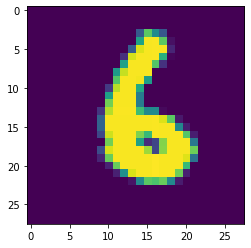

In [3]:
print(x_train.shape)
print(x_test.shape)

print(x_test.shape)
print(y_test.shape)

x_train[3]
y_train[0]
import matplotlib.pyplot as plt
plt.imshow(x_train[36])

**RESHAPING THE DATA**

In [4]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

**APPLYING ONE-HOT ENCODING**

In [5]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# **MODEL BUILDING**

**ADDING CNN LAYERS**

In [6]:
model=Sequential ()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(no_of_classes,activation = 'softmax'))

**COMPILING THE MODEL**

In [7]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

**TRAINING THE MODEL**

In [8]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.2445 - accuracy: 0.9473 - val_loss: 0.0772 - val_accuracy: 0.9763
Epoch 2/5
1875/1875 [==============================] - 177s 95ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0821 - val_accuracy: 0.9745
Epoch 3/5
1875/1875 [==============================] - 177s 95ms/step - loss: 0.0502 - accuracy: 0.9838 - val_loss: 0.0837 - val_accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 177s 94ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0820 - val_accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.1098 - val_accuracy: 0.9751


**OBSERVING THE METRCS**

In [9]:
metrics = model.evaluate(x_test, y_test, verbose = 0)
print("Metrics(Test loss and test accuracy): ")
print(metrics)

Metrics(Test loss and test accuracy): 
[0.10978507995605469, 0.9750999808311462]


**TESTING THE MODEL**

In [10]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

import numpy as np
print(np.argmax(prediction, axis=1)) 
np.argmax(y_test[5000:5001]) 

[[2.5153897e-15 2.0821814e-17 6.5726531e-14 1.8746100e-07 1.8410046e-07
  5.1352784e-09 4.0926296e-21 1.5398944e-09 1.7262092e-09 9.9999964e-01]]
[9]


3

**OBSERVING THE METRICS**

In [11]:
metrics = model.evaluate(x_test, y_test, verbose = 0)
print("Metrics(Test loss and test accuracy): ")
print(metrics)

Metrics(Test loss and test accuracy): 
[0.10978507995605469, 0.9750999808311462]


**TESTING THE MODEL**

In [12]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

import numpy as np
print(np.argmax(prediction, axis=1)) 
np.argmax(y_test[5000:5001]) 

[[2.5153897e-15 2.0821814e-17 6.5726531e-14 1.8746100e-07 1.8410046e-07
  5.1352784e-09 4.0926296e-21 1.5398944e-09 1.7262092e-09 9.9999964e-01]]
[9]


3

**SAVING THE MODEL**

In [24]:
model.save("digit.h5")

**TESTING WITH THE SAVED MODEL**

In [ ]:
# Done by testing the file with another jupyter code.

In [14]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 16.4 MB/s eta 0:00:01


In [31]:
from ibm_watson_machine_learning import APIClient
wml_credentials = { 
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "oNZeXLbzz90pX0ejFPfqrv_EpLsanqkwku_dmGbDfuIw"
}
client = APIClient(wml_credentials)

In [32]:
client

In [33]:
def guid_space_name(client, digit_deploy):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == digit_deploy)['metadata']['id'])

In [34]:
space_uid = guid_space_name(client, 'digit_recognition_project') #digit_recognition_project is the deployment space name
print("Space UID "+space_uid)

Space UID 1c425496-1a65-4853-9b1a-7f070e8725a0


In [35]:
client.set.default_space(space_uid)

'SUCCESS'

In [36]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [37]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [38]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [39]:
ls

digit.h5  handwritten_digit_recognition_model.tgz


In [45]:
ls

digit.h5  handwritten_digit_recognition_model.tgz


In [48]:
!tar -zcvf handwritten_digit_recognition_model.tgz digit.h5

digit.h5


In [50]:
model_details = client.repository.store_model(model = 'handwritten_digit_recognition_model.tgz', meta_props = { 
    client.repository.ModelMetaNames.NAME: "handwritten_digit_recognition_system", 
    client.repository.ModelMetaNames.TYPE: 'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid
})

In [51]:
model_id = client.repository.get_model_id(model_details)

In [52]:
model_id

'd0c0f338-21de-4d24-822c-f08ca97f5097'

In [53]:
client.repository.download(model_id, 'digit.tar.gb')

Successfully saved model content to file: 'digit.tar.gb'


'/home/wsuser/work/digit.tar.gb'

In [54]:
ls

digit.h5  digit.tar.gb  handwritten_digit_recognition_model.tgz
